In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
     

In [2]:
insurancedata=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurancedata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:ylabel='Frequency'>

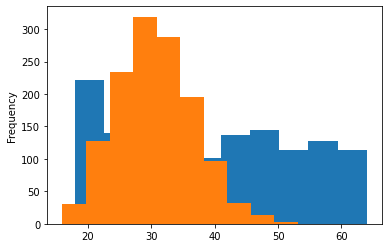

In [3]:
insurancedata["age"].plot(kind="hist")
insurancedata["bmi"].plot(kind="hist")

Normalization Converts all values between 0 and without distorting orginal distribution. MinMaxScaler in Scikit Learn can be used to implement this.

Standarization: Removes the mean and divides each value by satndard deviation. StandardScalar in Scikit Learn can be used to implement this.

This reduces the effect of outliers and trasform the distribution close to a normal distribution.

In [4]:
#data preprocessing
#importing required modules
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
#Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"]))
#Create the X and y Values
X=insurancedata.drop("charges",axis=1)
y=insurancedata["charges"]
#Build out train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Fit the column transformer on training data
ct.fit(X_train)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [5]:
#Check the data
print(X_train_normal[0])
print(X_train.shape,X_train_normal.shape)

[0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]
(1070, 6) (1070, 11)


In [6]:
#Model Building to fit the normailised data
#set the random feed to reproduce the data
tf.random.set_seed=42
#Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Comple the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics="mae")
#Fit the model
insurance_model.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 4s 10ms/step - loss: 13343.3311 - mae: 13343.3311
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13332.5938 - mae: 13332.5938
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13306.4033 - mae: 13306.4033
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13253.8965 - mae: 13253.8965
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13164.1914 - mae: 13164.1914
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13026.4912 - mae: 13026.4912
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12829.8174 - mae: 12829.8174
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12564.3213 - mae: 12564.3213
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12220.5986 - mae: 12220.5986
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11796.8

In [7]:
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.1101 - mae: 3169.1101


[3169.110107421875, 3169.110107421875]